bilberry
blackberry
blueberry
boysenberry
cloudberry
cranberry
elderberry
goji berry
gooseberry
huckleberry
mulberry
raspberry
salal berry
strawberry
ab
ae
eab
apple
blackberry
mandarine
nectarine
pineapple
pomegranate
raspberry
salal berry
a
ab
abb
ab
abb
a
ab
abb
exact
example
exercise
exist
system
type
apple
canary melon
coconut
nut
pineapple
rock melon
watermelon
blood orange
gooseberry
lychee
purple mangosteen
0     True
1    False
2    False
dtype: bool
                name  count
716            Maxie    245
22              Alex    237
34         Alexander    226
442            Felix    212
698              Max    206
..               ...    ...
544           Jexton      1
540  Jaydenalexander      1
528            Jaxun      1
513           Jaxper      1
973            Zzyzx      1

[974 rows x 2 columns]


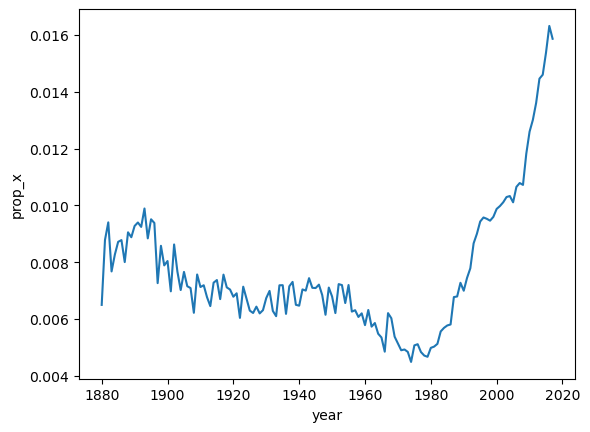

0    2
1    0
2    1
dtype: int64
2
           name  count  vowels  consonants
0        Leslie    276       3           3
1       William    276       3           4
2        Jessie    276       3           3
3       Johnnie    276       3           4
4         James    276       2           3
...         ...    ...     ...         ...
97305  Dawndria      1       3           5
97306    Dasjia      1       3           3
97307  Darlenis      1       3           5
97308    Darbee      1       3           3
97309     Zykai      1       2           3

[97310 rows x 4 columns]
           name  count  vowels  consonants
0        leslie    276       3           3
1       william    276       3           4
2        jessie    276       3           3
3       johnnie    276       3           4
4         james    276       2           3
...         ...    ...     ...         ...
97305  dawndria      1       3           5
97306    dasjia      1       3           3
97307  darlenis      1       3     

/var/folders/fw/m5f2ykhd1yzc0yxvp3g1vy180000gp/T/ipykernel_1745/2105602821.py:51: FutureWarning: The default value of regex will change from True to False in a future version.
  print(x_series.str.replace("[aeiou]", "-"))
/var/folders/fw/m5f2ykhd1yzc0yxvp3g1vy180000gp/T/ipykernel_1745/2105602821.py:52: FutureWarning: The default value of regex will change from True to False in a future version.
  print(x_series.str.replace("[aeiou]", ""))


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load data
babynames = pd.read_csv('data/babynames.csv')
fruit = pd.read_csv('data/fruit.csv', header=None, names=["name"])
words = pd.read_csv('data/words.csv', header=None, names=["word"])
# sentences.csv is not mentioned in the provided code, so I'm not loading it.

# Function to view matching patterns in a dataframe column (similar to str_view in R)
def str_view(df, colname, pattern):
    matches = df[colname].str.contains(pattern)
    for idx, value in df[matches].iterrows():
        print(re.sub(pattern, lambda m: f"\033[1;31m{m.group(0)}\033[m", value[colname]))

str_view(fruit, 'name', "berry")
str_view(pd.DataFrame({"data": ["a", "ab", "ae", "bd", "ea", "eab"]}), 'data', "a.")
str_view(fruit, 'name', "a...e")
str_view(pd.DataFrame({"data": ["a", "ab", "abb"]}), 'data', "ab?")
str_view(pd.DataFrame({"data": ["a", "ab", "abb"]}), 'data', "ab+")
str_view(pd.DataFrame({"data": ["a", "ab", "abb"]}), 'data', "ab*")
str_view(words, 'word', "[aeiou]x[aeiou]")
str_view(words, 'word', "[^aeiou]y[^aeiou]")
str_view(fruit, 'name', "apple|melon|nut")
str_view(fruit, 'name', "aa|ee|ii|oo|uu")

print(pd.Series(["a", "b", "c"]).str.contains("[aeiou]"))

babynames_with_x = babynames[babynames['name'].str.contains("x")]
print(babynames_with_x.groupby('name').size().reset_index(name='count').sort_values(by='count', ascending=False))

prop_x_by_year = babynames.groupby('year').apply(lambda x: x['name'].str.contains("x").mean()).reset_index(name='prop_x')
sns.lineplot(data=prop_x_by_year, x='year', y='prop_x')
plt.show()

x_series = pd.Series(["apple", "banana", "pear"])
print(x_series.str.count("p"))
print("abababa".count("aba"))

babynames_counts = babynames['name'].value_counts().reset_index()
babynames_counts.columns = ['name', 'count']
babynames_counts['vowels'] = babynames_counts['name'].str.count("[aeiou]")
babynames_counts['consonants'] = babynames_counts['name'].str.count("[^aeiou]")
print(babynames_counts)

babynames_counts['name'] = babynames_counts['name'].str.lower()
print(babynames_counts)

print(x_series.str.replace("[aeiou]", "-"))
print(x_series.str.replace("[aeiou]", ""))

# df = pd.DataFrame({
#     'str': [
#         "<Sheryl>-F_34",
#         "<Kisha>-F_45",
#         "<Brandon>-N_33",
#         "<Sharon>-F_38",
#         "<Penny>-F_58",
#         "<Justin>-M_41",
#         "<Patricia>-F_84"
#     ]
# })

# patterns = {
#     'name': "[A-Za-z]+",
#     'gender': ".",
#     'age': "[0-9]+"
# }
# for col, pat in patterns.items():
#     df[col] = df['str'].str.extract(f"{pat}")
# print(df)
df = pd.DataFrame({
    'str': [
        "<Sheryl>-F_34",
        "<Kisha>-F_45",
        "<Brandon>-N_33",
        "<Sharon>-F_38",
        "<Penny>-F_58",
        "<Justin>-M_41",
        "<Patricia>-F_84"
    ]
})

pattern = "<(?P<name>[A-Za-z]+)>-(?P<gender>.)_(?P<age>[0-9]+)"
extracted = df['str'].str.extract(pattern)
df = pd.concat([df, extracted], axis=1)
print(df)


In [19]:
import pandas as pd
import re

# Load data
fruit = pd.read_csv('data/fruit.csv', header=None, names=["name"])
words = pd.read_csv('data/words.csv', header=None, names=["word"])
sentences = pd.read_csv('data/sentences.csv', header=None, names=["sentence"])

# Function to view matching patterns in a dataframe column or a list of strings
def str_view(data, pattern):
    if isinstance(data, pd.DataFrame):
        matches = data.applymap(lambda s: bool(re.search(pattern, s)))
        for idx, row in data[matches].iterrows():
            print(re.sub(pattern, lambda m: f"\033[1;31m{m.group(0)}\033[m", row[0]))
    else:
        for s in data:
            if re.search(pattern, s):
                print(re.sub(pattern, lambda m: f"\033[1;31m{m.group(0)}\033[m", s))

dot = "\\."

str_view(dot, dot)
str_view(["abc", "a.c", "bef"], "a\\.c")

x = "a\\b"
str_view(x, x)
str_view(x, "\\\\")
str_view(x, r"{\\}")
str_view(["abc", "a.c", "a*c", "a c"], "a[.]c")
str_view(["abc", "a.c", "a*c", "a c"], ".[*]c")

str_view(fruit['name'], "^a")
str_view(fruit['name'], "a$")
str_view(fruit['name'], "apple")
str_view(fruit['name'], "^apple$")

x_list = ["summary(x)", "summarize(df)", "rowsum(x)", "sum(x)"]
str_view(x_list, "sum")
str_view(x_list, "\\bsum\\b")

str_view("abc", "[$^\\b]")
print("abc".replace("$", "--").replace("^", "--").replace("\\b", "--"))

x = "abcd ABCD 12345 -!@#%."
str_view(x, "[abc]+")
str_view(x, "[a-z]+")
str_view(x, "[^a-z0-9]+")
str_view("a-b-c", "[a-c]")
str_view("a-b-c", "[a\\-c]")
str_view(x, "\\d+")
str_view(x, "\\D+")
str_view(x, "\\s+")
str_view(x, "\\S+")
str_view(x, "\\w+")
str_view(x, "\\W+")

str_view(fruit['name'], "(..)\\1")
str_view(words['word'], "^(..).*\\1$")

replaced_sentences = sentences['sentence'].str.replace(r"(\w+) (\w+) (\w+)", r"\1 \3 \2")
str_view(replaced_sentences, r".*")

matches = sentences['sentence'].str.extract(r"the (\w+) (\w+)")
print(matches.head())

matches.columns = ['word1', 'word2']
print(matches)

x_list = ["a gray cat", "a grey dog"]
matches = pd.DataFrame([re.findall(r"gr(e|a)y", s) for s in x_list])
print(matches)

matches = pd.DataFrame([re.findall(r"gr(?:e|a)y", s) for s in x_list])
print(matches)


.
a.c
a
\
a.c
a*c
apple
apricot
avocado
banana
cherimoya
feijoa
guava
papaya
satsuma
apple
pineapple
apple
summary(x)
summarize(df)
rowsum(x)
sum(x)
sum(x)
abc
a
b
c
a
b
c
d
 
A
B
C
D
 
 
-
!
@
#
%
.
a
b
c
a
-
-
c
1
2
3
4
5
a
b
c
d
 
A
B
C
D
 
 
-
!
@
#
%
.
 
 
 
a
b
c
d
A
B
C
D
1
2
3
4
5
-
!
@
#
%
.
a
b
c
d
A
B
C
D
1
2
3
4
5
 
 
 
-
!
@
#
%
.
banana
coconut
cucumber
jujube
papaya
salal berry
church
decide
photograph
require
sense
x
The canoe birch slid the on smooth planks.
Glue sheet the to dark the blue background.
It's to easy tell depth the of well a.
These a days chicken is leg a dish rare.
Rice often is served round in bowls.
The of juice lemons fine makes punch.
The was box thrown the beside parked truck.
The were hogs fed corn chopped and garbage.
Four of hours steady faced work us.
A size large in is stockings hard sell to.
The was boy there the when sun rose.
A is rod used catch to pink salmon.
The of source the river huge is clear the spring.
Kick ball the straight follow a

/var/folders/fw/m5f2ykhd1yzc0yxvp3g1vy180000gp/T/ipykernel_1745/3631899493.py:60: FutureWarning: The default value of regex will change from True to False in a future version.
  replaced_sentences = sentences['sentence'].str.replace(r"(\w+) (\w+) (\w+)", r"\1 \3 \2")


In [20]:
import pandas as pd
import re

# Function to view matching patterns in a dataframe column or a list of strings
def str_view(data, pattern, flags=0):
    if isinstance(data, pd.DataFrame):
        matches = data.applymap(lambda s: bool(re.search(pattern, s, flags)))
        for idx, row in data[matches].iterrows():
            print(re.sub(pattern, lambda m: f"\033[1;31m{m.group(0)}\033[m", row[0], flags=flags))
    else:
        for s in data:
            if re.search(pattern, s, flags):
                print(re.sub(pattern, lambda m: f"\033[1;31m{m.group(0)}\033[m", s, flags=flags))

def str_detect(data, pattern, flags=0):
    if isinstance(data, pd.DataFrame):
        return data.applymap(lambda s: bool(re.search(pattern, s, flags)))
    else:
        return [bool(re.search(pattern, s, flags)) for s in data]

bananas = ["banana", "Banana", "BANANA"]
str_view(bananas, "banana")
str_view(bananas, "banana", flags=re.IGNORECASE)

x = "Line 1\nLine 2\nLine 3"
str_view(x, ".Line")
str_view(x, ".Line", flags=re.DOTALL)
str_view(x, "^Line")
str_view(x, "^Line", flags=re.MULTILINE)

phones = ["514-791-8141", "(123) 456 7890", "123456"]
phone_pattern = r"""
    \(?     # optional opening parens
    (\d{3}) # area code
    [)\-]?  # optional closing parens or dash
    \ ?     # optional space
    (\d{3}) # another three numbers
    [\ -]?  # optional space or dash
    (\d{4}) # four more numbers
"""
matches = [re.search(phone_pattern, s, re.VERBOSE) for s in phones]
print([m.group(0) if m else None for m in matches])

str_view(["", "a", "."], r"\.")
str_view("x X", "X", flags=re.IGNORECASE)

str_view("i İ ı I", "İ", flags=re.IGNORECASE)
# No direct equivalent in Python for locale-based matching, so this is an approximation
str_view("i İ ı I", "İ", flags=re.IGNORECASE)

str_view(sentences['sentence'], "^The")
str_view(sentences['sentence'], "^The\\b")
str_view(sentences['sentence'], "^(She|He|It|They)\\b")

pos = ["He is a boy", "She had a good time"]
neg = ["Shells come from the sea", "Hadley said 'It's a great day'"]

pattern = "^(She|He|It|They)\\b"
print(str_detect(pos, pattern))
print(str_detect(neg, pattern))

str_view(words['word'], "^[^aeiou]+$")

# filtered_words = words[~str_detect(words['word'], "[aeiou]")]
# str_view(filtered_words['word'], ".*")
filtered_words = words[~words['word'].str.contains("[aeiou]")]
str_view(filtered_words['word'], ".*")

str_view(words['word'], "a.*b|b.*a")
ab_words = words[words['word'].str.contains("a") & words['word'].str.contains("b")]
print(ab_words)


# vowel_words = words[
#     str_detect(words['word'], "a") &
#     str_detect(words['word'], "e") &
#     str_detect(words['word'], "i") &
#     str_detect(words['word'], "o") &
#     str_detect(words['word'], "u")
# ]
# print(vowel_words)
filtered_words = words[
    (words['word'].str.contains("a")) &
    (words['word'].str.contains("e")) &
    (words['word'].str.contains("i")) &
    (words['word'].str.contains("o")) &
    (words['word'].str.contains("u"))
]
print(filtered_words)


str_view(sentences['sentence'], "\\b(red|green|blue)\\b")


banana
banana
Banana
BANANA
['514-791-8141', '(123) 456 7890', None]
.
x
X
i
İ
ı
I
i
İ
ı
I
The birch canoe slid on the smooth planks.
These days a chicken leg is a rare dish.
The juice of lemons makes fine punch.
The box was thrown beside the parked truck.
The hogs were fed chopped corn and garbage.
The boy was there when the sun rose.
The source of the huge river is the clear spring.
The soft cushion broke the man's fall.
The salt breeze came across from the sea.
The girl at the booth sold fifty bonds.
The small pup gnawed a hole in the sock.
The fish twisted and turned on the bent hook.
The swan dive was far short of perfect.
The beauty of the view stunned the young boy.
The colt reared and threw the tall rider.
The wrist was badly strained and hung limp.
The stray cat gave birth to kittens.
The young girl gave no clear response.
The meal was cooked before the bell rang.
The ship was torn apart on the sharp reef.
The wide road shimmered in the hot sun.
The lazy cow lay in the cool gr

In [21]:
import pandas as pd
import re

# Assuming sentences.csv is loaded into a dataframe named 'sentences'
# sentences = pd.read_csv('sentences.csv')

# Create the regex pattern for rgb colors
rgb = ["red", "green", "blue"]
pattern = r"\b(" + "|".join(rgb) + r")\b"
print(pattern)

cols = ['red1', 'blue', 'green45', 'yellow']

# Remove colors that contain digits
cols = [color for color in cols if not any(char.isdigit() for char in color)]
print(cols)

names_with_replace = [name for name in dir() if 'replace' in name]
print(names_with_replace)

import os

rmd_files = [f for f in os.listdir() if f.endswith('.Rmd')]
print(rmd_files[:6])  # Show first 6, equivalent to R's `head()`


\b(red|green|blue)\b
['blue', 'yellow']
['names_with_replace', 'replaced_sentences']
[]


In [22]:


# Loading sentences.csv into a dataframe named 'sentences'
sentences = pd.read_csv('data/sentences.csv')

# Given the 'cols' from the previous example:
# cols = ['red', 'blue', 'green', 'yellow']

# Create the regex pattern using 'cols'
pattern = r"\b(" + "|".join(cols) + r")\b"

# Using 'str.contains' to filter sentences that match the pattern and view them
matching_sentences = sentences[sentences['x'].str.contains(pattern, case=False, na=False, regex=True)]

print(matching_sentences)



                                                   x
1        Glue the sheet to the dark blue background.
25                   Two blue fish swam in the tank.
91             A wisp of cloud hung in the blue air.
111        Leaves turn brown and yellow in the fall.
173  The sky that morning was clear and bright blue.
203              A blue crane is a tall wading bird.
216             It is hard to erase blue or red ink.
451       The couch cover and hall drapes were blue.
490         A man in a blue sweater sat at the desk.
630           Tear a thin sheet from the yellow pad.


/var/folders/fw/m5f2ykhd1yzc0yxvp3g1vy180000gp/T/ipykernel_1745/2626631560.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  matching_sentences = sentences[sentences['x'].str.contains(pattern, case=False, na=False, regex=True)]
